<a href="https://colab.research.google.com/github/eloizalencar/ICD/blob/main/aulagrafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importantando do Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/datasets/MICRODADOS_ENEM_2017.csv'

df = pd.read_csv(
    path, 
  encoding='iso-8859-1', #codificação dos caracteres
  sep=';',   #separador de colunas
  usecols=['TP_ESTADO_CIVIL']  #LER SÓ A COLUNA ESTADO CIVIL
)

df.info() #uso de memoria 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731278 entries, 0 to 6731277
Data columns (total 1 columns):
 #   Column           Dtype
---  ------           -----
 0   TP_ESTADO_CIVIL  int64
dtypes: int64(1)
memory usage: 51.4 MB


In [ ]:
df_temp = df['TP_ESTADO_CIVIL'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    0: "Não informado",
    1: "Solteiro(a)",
    2: "Casada(a)/Mora com companheiro(a)",
    3: "Divorciado(a)/Desquitado(a)/Separado(a)",
    4: "Viuvo(a)"
})
df_temp

Solteiro(a)                                0.843897
Casada(a)/Mora com companheiro(a)          0.099498
Não informado                              0.040355
Divorciado(a)/Desquitado(a)/Separado(a)    0.014689
Viuvo(a)                                   0.001561
Name: TP_ESTADO_CIVIL, dtype: float64

Importando bibliotecas do matplot para fazer o grafico

In [ ]:
import matplotlib.pyplot as plt

Grafico de barra por estado civil

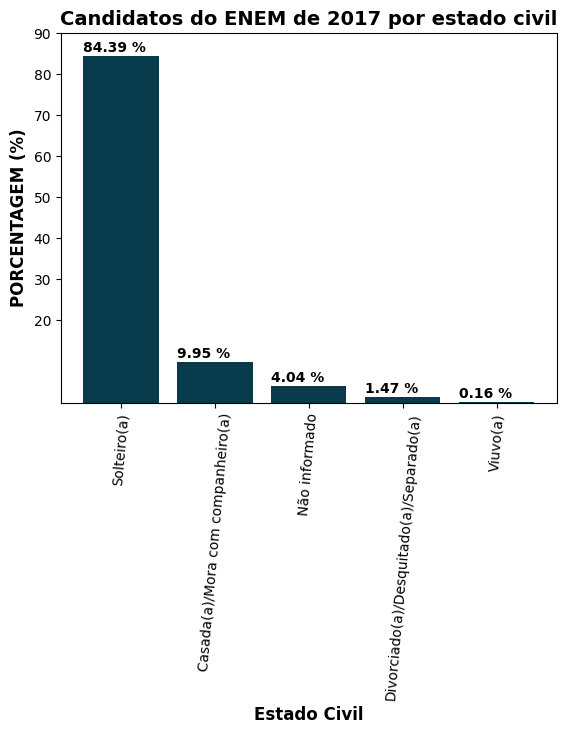

In [ ]:
#Fazer grafico completo de barras de inscritos por estado civil

x = list(range(1,len(df_temp)+1))    # posições no eixo x das barras
heights = df_temp.values # Valores

# Criando o gráfico
plt.bar (x, heights,
    color=len(df_temp)*["#073B4C"],       # Cores das barras
    tick_label=df_temp.index,             # Rótulo das barras
)

# Propriedades gerais

## Título
plt.title(
    "Candidatos do ENEM de 2017 por estado civil", # Texto
    fontsize=14,                               # Fonte de tamanho 14
    fontweight='bold'                          # Fonte em negrito
)

## Rótulo do eixo horizontal
plt.xlabel(
    "Estado Civil",                          # Texto
    fontsize=12,                         # Fonte de tamanho 12
    fontweight='bold'                    # Fonte em negrito
)
plt.xticks(rotation=85)                 # rotação de 85° no rótulo x

## Rótulo do eixo vertical
plt.ylabel(
    "PORCENTAGEM (%)",                  # Texto
    fontsize=12,                        # Fonte de tamanho 12
    fontweight='bold'                   # Fonte em negrito    
)

## Marcações do eixo vertical
positions = [(i+1) * 0.1 for i in range(1, int(10*max(df_temp.values)+1))]
label_positions = list(map(lambda x: int(100*x), positions))
plt.yticks(positions, label_positions)

## Valores nas barras
for i, estado_civil in enumerate(df_temp.index):
    plt.text(
        0.6 + i,                                   # posição x do texto
        df_temp[estado_civil] + 0.02,                  # posição y do texto
        "{:.2f} %".format(100*df_temp[estado_civil]),  # texto
        va='center',                               # alinhamento centralizado
        fontweight='bold'                          # fonte em negrito
    )

# Mostrando o gráfico
plt.show()


Grafico de pizza de Nacionalidade

In [ ]:
#Lendo a coluna de Nacionalidade

path = '/content/drive/MyDrive/datasets/MICRODADOS_ENEM_2017.csv'

df = pd.read_csv(
    path, 
  encoding='iso-8859-1', #codificação dos caracteres
  sep=';',   #separador de colunas
  usecols=['TP_NACIONALIDADE']  #LER SÓ A COLUNA ESTADO CIVIL
)

df.info() #uso de memoria 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731278 entries, 0 to 6731277
Data columns (total 1 columns):
 #   Column            Dtype
---  ------            -----
 0   TP_NACIONALIDADE  int64
dtypes: int64(1)
memory usage: 51.4 MB


In [ ]:
#

df_temp = df['TP_NACIONALIDADE'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    0: "Não informado",
    1: "Brasileiro(a)",
    2: "Brasileiro(a)/Naturalizado(a)",
    3: "Estrangeiro(a)",
    4: "Brasileiro(a)Nato(a), nascido(a) no exterior"
})
df_temp

Brasileiro(a)                                   0.965865
Brasileiro(a)/Naturalizado(a)                   0.030101
Brasileiro(a)Nato(a), nascido(a) no exterior    0.002431
Estrangeiro(a)                                  0.001233
Não informado                                   0.000370
Name: TP_NACIONALIDADE, dtype: float64

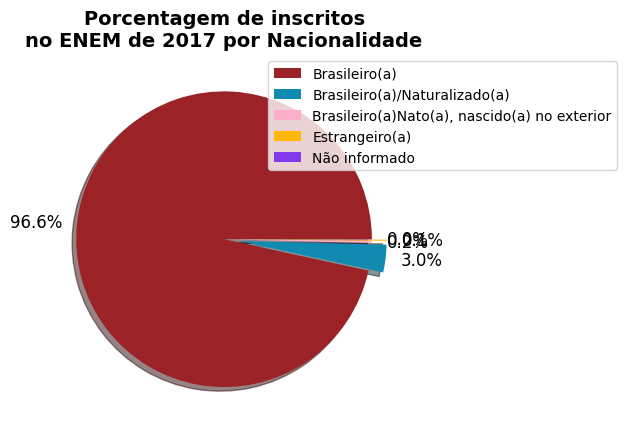

In [ ]:
#Grafico de pizza

# Valores (x) para o gráfico
x = df_temp.values

## Criando o gráfico com mais propriedades

plt.pie(x,                               
  # Valores
    labels=["{:.1f}%".format(100*x[0]),               # Rótulo do 1º setor
            "{:.1f}%".format(100*x[1]),               # Rótulo do 2º setor
            "{:.1f}%".format(100*x[2]),               # Rótulo do 3º setor
            "{:.1f}%".format(100*x[3]),               # Rótulo do 4º setor
            "{:.1f}%".format(100*x[4])               # Rótulo do 5º setor
            ],              
    colors=["#9b2226", "#118AB2", "#ffafcc", "#ffb703", "#8338ec"],                   
     # Cores respectivas dos setores
    shadow=True,                                      # Sombra no gráfico
    explode=[0,0.1,0, 0.1, 0],                                  # Destacando o 2º setor
    textprops={                                       # Propriedades do texto dos rótulos
        "fontsize":12                                 # Fonte de tamanho 12
    }
)

## Propriedades gerais

## Título
plt.title(
    "Porcentagem de inscritos\nno ENEM de 2017 por Nacionalidade", # Texto
    fontsize=14,                                          # Fonte de tamanho 14
    fontweight='bold'                                     # Fonte em negrito
)
## Legenda
plt.legend(
    df_temp.index,                                     # Texto
    bbox_to_anchor=(0.6, 0, 0.5, 1),                   # Posição da legenda
    prop={                                             # Outras propriedades 
        "size": 'medium',                              # Fonte de tamanho médio
    }
)

## Mostrando o gráfico
plt.show()

Grafico de pizza com 3 variaveis ( Situação de funcionamento)

In [ ]:
#Lendo a coluna de Situação de funcionamento

path = '/content/drive/MyDrive/datasets/MICRODADOS_ENEM_2017.csv'

df = pd.read_csv(
    path, 
  encoding='iso-8859-1', #codificação dos caracteres
  sep=';',   #separador de colunas
  usecols=['TP_LOCALIZACAO_ESC']  #LER SÓ A COLUNA ESTADO CIVIL
)

df.info() #uso de memoria 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731278 entries, 0 to 6731277
Data columns (total 1 columns):
 #   Column              Dtype  
---  ------              -----  
 0   TP_LOCALIZACAO_ESC  float64
dtypes: float64(1)
memory usage: 51.4 MB


In [ ]:

df_temp = df['TP_LOCALIZACAO_ESC'].value_counts(normalize=True)
df_temp.index = df_temp.index.map({
    0: "Urbana",
    1: "Rural",
    
   
})

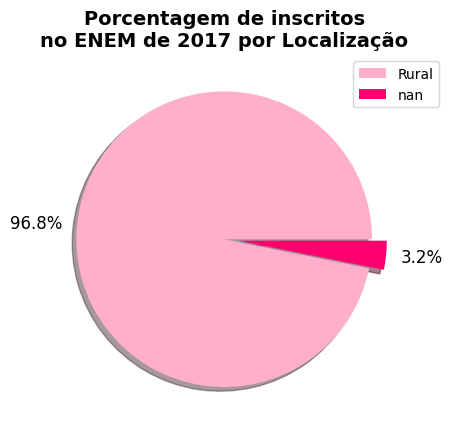

In [ ]:
#Grafico de pizza

# Valores (x) para o gráfico
x = df_temp.values

## Criando o gráfico com mais propriedades

plt.pie(x,                               
  # Valores
    labels=["{:.1f}%".format(100*x[0]),               # Rótulo do 1º setor
            "{:.1f}%".format(100*x[1]),               # Rótulo do 2º setor
        
            ],              
    colors=[ "#ffafcc", "#ff006e", ],                   
     # Cores respectivas dos setores
    shadow=True,                                      # Sombra no gráfico
    explode=[0,0.1],                                  # Destacando o 2º setor
    textprops={                                       # Propriedades do texto dos rótulos
        "fontsize":12                                 # Fonte de tamanho 12
    }
)

## Propriedades gerais

## Título
plt.title(
    "Porcentagem de inscritos\nno ENEM de 2017 por Localização", # Texto
    fontsize=14,                                          # Fonte de tamanho 14
    fontweight='bold'                                     # Fonte em negrito
)
## Legenda
plt.legend(
    df_temp.index,                                     # Texto
    bbox_to_anchor=(0.6, 0, 0.5, 1),                   # Posição da legenda
    prop={                                             # Outras propriedades 
        "size": 'medium',                              # Fonte de tamanho médio
    }
)

## Mostrando o gráfico
plt.show()